<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_4_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

## Demonstration 4.1.6 Feature scaling
The California Housing data set is a widely used benchmark data set in machine learning and statistics for predicting median house values in Californian districts, in the USA. It originates from the 1990 Census and has been utilised in many machine learning experiments, tutorials, and courses to demonstrate regression analysis and various predictive modelling techniques.

The key features of the data set are:
- Geographical coverage: The data set covers housing data from various districts across California.
- Observation: There are tens of thousands of observations, with each observation representing a district, not an individual house.
- Features: The data set contains multiple features that are believed to influence housing prices:
  - `MedInc`: median income in a district (tens of thousands of US dollar)
  - `HouseAge`: median house age in a district (years)
  - `AveRooms`: average number of rooms (one to 10)
  - `AveBedrms`: average number of bedrooms (one and 10)
  - `Population`: Population in a district (thousands)
  - `AveOccup`: average occupancy per household (one to 10)
  - `Latitude` and `Longitude `: latitude and longitude for geographical plotting (degrees, minutes, seconds)
  - `MedHouseVal`: median house value for California districts and the target variable (hundreds of thousands of US$).

Follow the demonstration to explore the importance of feature scaling based on the California Housing data set. In this video, you will learn how to employ min-max and standardisation methods to scale features.

In [ ]:
# Import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Import the California Housing data set.
california_housing = fetch_california_housing()

# Convert the data set into a DataFrame.
df_california = pd.DataFrame(california_housing.data,
                             columns=california_housing.feature_names)

# View the data.
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Descriptive statistics.
df_california.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


> **Min-Max scaling** rescales the feature to a fixed range, usually 0 to 1, or -1 to 1, by subtracting the minimum value of the feature and then dividing by the range of the feature.
>
> **Standardisation** or z-score normalisation rescales the features so they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.


In [ ]:
# 1. Min-max scaling.
min_max_scaler = MinMaxScaler()
df_california['MedInc_MinMax'] = min_max_scaler.fit_transform(df_california[['MedInc']])

# 2. Standardisation.
standard_scaler = StandardScaler()
df_california['MedInc_Standardized'] = standard_scaler.fit_transform(df_california[['MedInc']])

# View output.
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_MinMax,MedInc_Standardized
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.539668,2.344766
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.538027,2.332238
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.466028,1.782699
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.354699,0.932968
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.230776,-0.012881


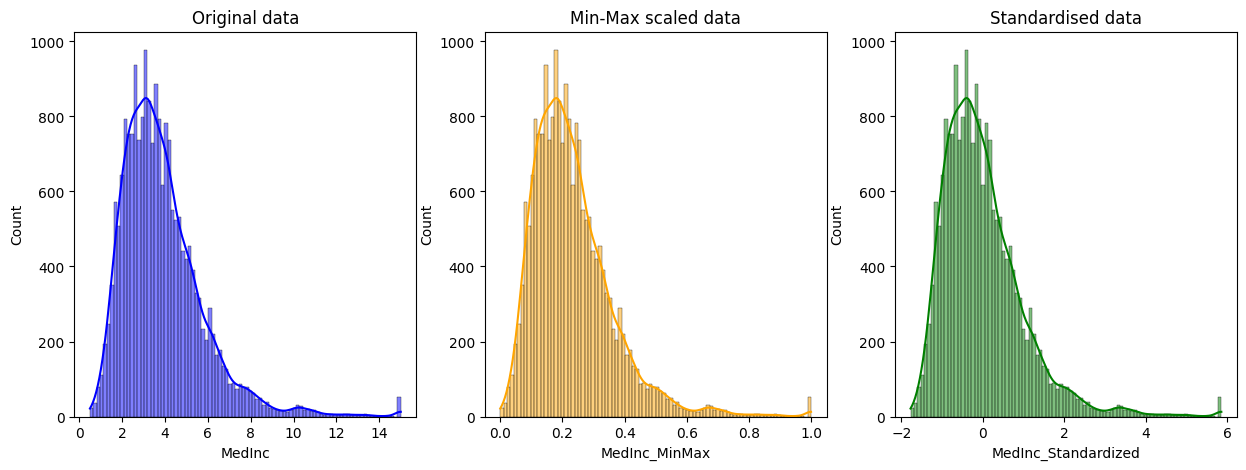

In [ ]:
# Data distribution before and after scaling.
# Setting up the matplotlib figure.
plt.figure(figsize=(15, 5))

# Original data distribution.
plt.subplot(1, 3, 1)
sns.histplot(df_california['MedInc'], kde=True, color='blue')
plt.title('Original data')

# Min-max scaled data distribution.
plt.subplot(1, 3, 2)
sns.histplot(df_california['MedInc_MinMax'], kde=True, color='orange')
plt.title('Min-Max scaled data')

# Standardised data distribution.
plt.subplot(1, 3, 3)
sns.histplot(df_california['MedInc_Standardized'], kde=True, color='green')
plt.title('Standardised data')

plt.show()

> The distribution of data does not change after the transformation. In the case of normalisation or min-max scaling, the range changes. In the case of standardisation, the range changes and the data becomes centered.
>
> When creating histograms for nomalised or standardised data, the goal is to preserve the shape of the original distribution. Any differences in the shape of the histogram could be due to the choice of the bin size or the number of bins used, rather than an actual change in the underlying distribution.

# Key information
This demonstration illustrated the utility of feature scaling in a business context. Any modifications made to the original data will impact the machine learning model's accuracy.


## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.